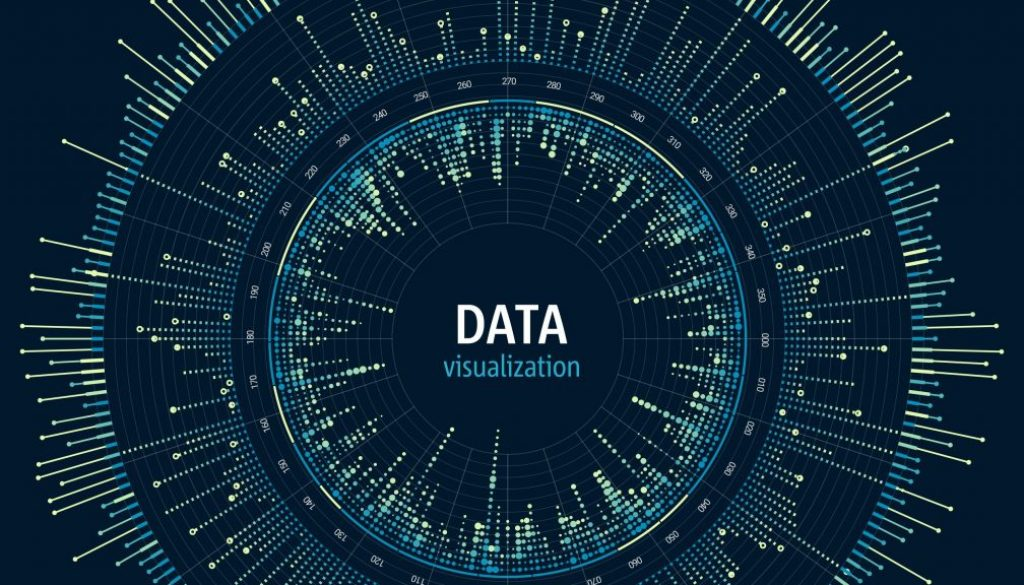

TASK A

In [240]:
#uploading files

data <- read.csv("C:/Users/FDN-Aysu/Downloads/ppdata_lite.csv", header = TRUE, sep = ',')

ukpostcodes <- read.csv("C:/Users/FDN-Aysu/Downloads/ukpostcodes.csv", header = TRUE, sep = ',')


I wanted to plot of London city boroughts. There are 33 boroughts in London with names: City of London, Barking and Dagenham, Barnet, Bexley, Brent, Bromley, Camden, Croydon, Ealing, Enfield, Greenwich, Hackney, Hammersmith and Fulham, Haringey, Harrow, Havering, Hillingdon, Hounslow, Islington, Kensington and Chelsea, Kingston upon Thames, Lambeth, Lewisham, Merton, Newham, Redbridge, Richmond upon Thames, Southwark, Sutton, Tower Hamlets, Waltham Forest, Wandsworth, Westminster.

In [241]:
data1<-data[1:20000,]
data_london<-data1 %>% 
    filter_all(any_vars(. %in% c("GREATER LONDON")))
data_london<-data_london[1:5000,]

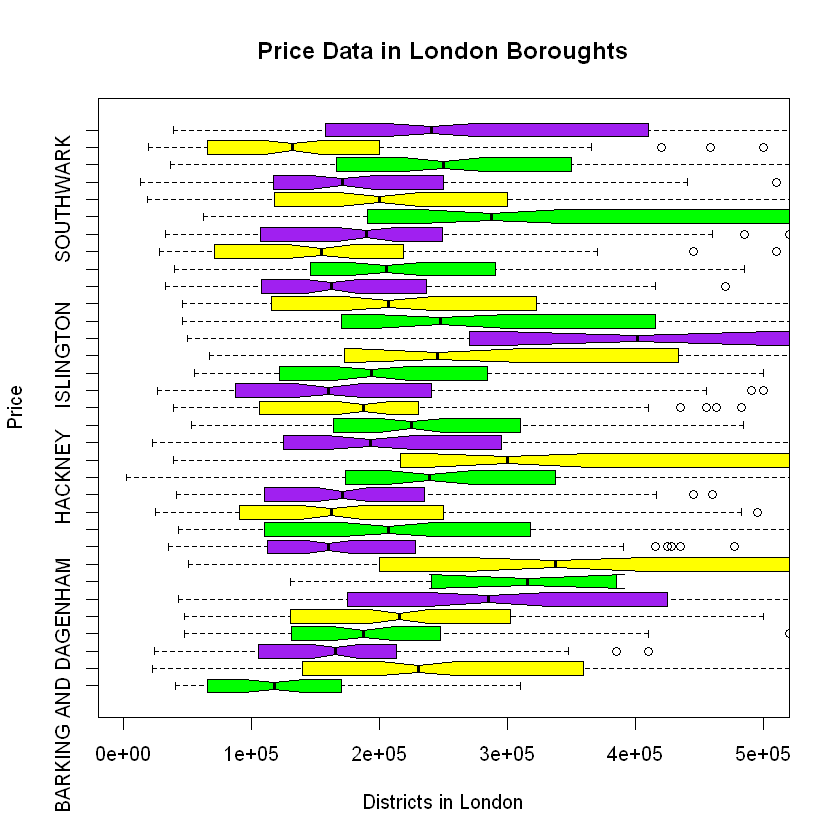

In [242]:
library(dplyr)
library(ggplot2)
boxplot(price ~ district, data = data_london, 
        xlab = "Districts in London",
        ylab = "Price", 
        main = "Price Data in London Boroughts",
        notch = T, 
        varwidth = F, 
        col = c("green","yellow","purple"),
        ylim= c(0,500000),
        height=100,
        witdh=50,
        horizontal=TRUE
)


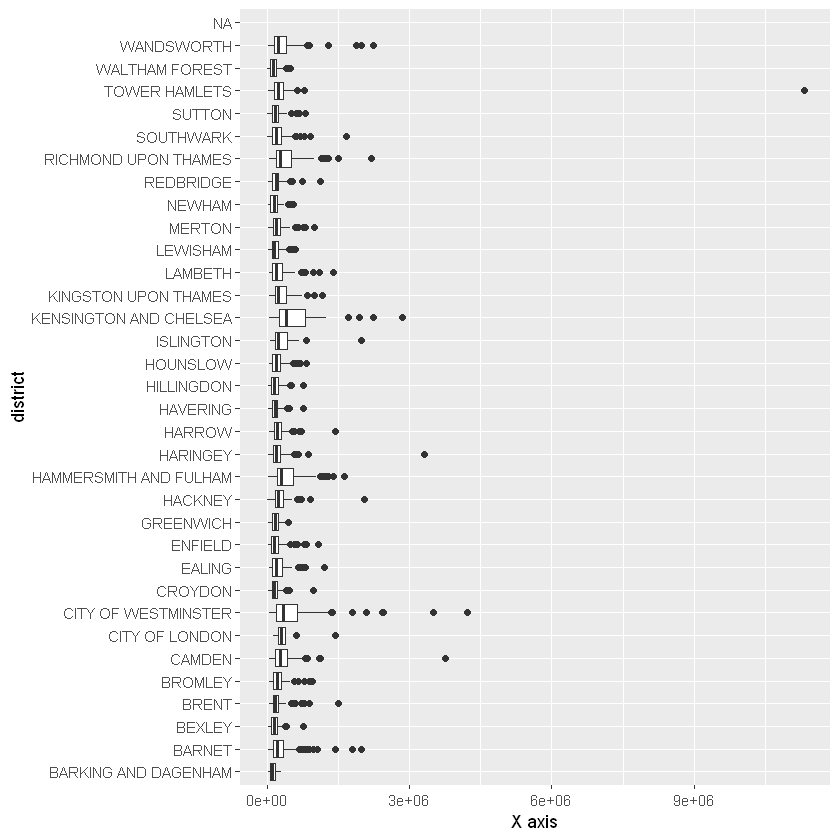

In [243]:
q<-ggplot(data_london, aes(price,district)) +
geom_boxplot()


q + scale_x_continuous("X axis")

Instead of box plot, geom point usage can provide a better visualization

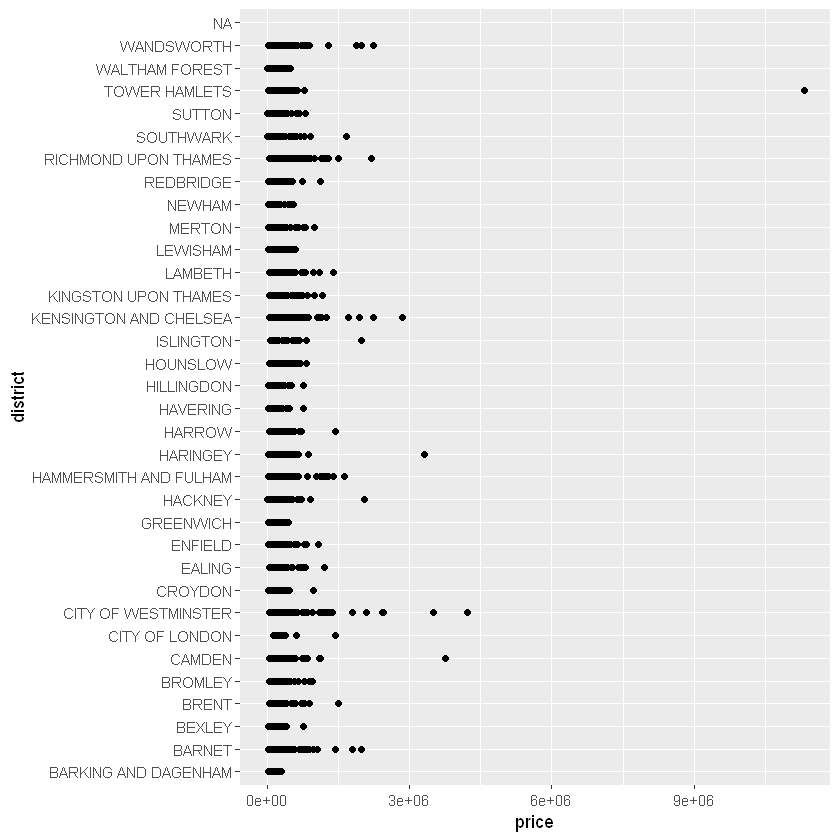

In [244]:
ggplot(data_london, 
       aes(price,district)) + 
geom_point()

There is no way to see the directly relationship between price and floor level. Because data set has no information about floor level. However, we can use property type to infering. Teraced type of buildings generally constructed at the top of the building so, we can say teraced type has the highest floor level. 

In [290]:
merge_data1 <- merge(data, ukpostcodes, by = "postcode")

In [291]:
#I splitted postcode by numbers using strsplit function
only_code<-strsplit(merge_data1$postcode, split = "[0-9]+")
#This code turned postcode two letter part, We need first variable
#First two letter is in location 4 and 5
merge_data1$postnew<-substr(only_code, 4,5)
#now we have actual post codes in postnew column

In [292]:
#for merging by a group I used data.table library
library(data.table) 
setDT(merge_data1)

In [294]:
group_all_dates1 <- aggregate(merge_data1$price, by=list(merge_data1$postnew,merge_data1$date_of_transfer,merge_data1$property_type), mean)

In [295]:
colnames(group_all_dates1)[1] <- "postnew"
colnames(group_all_dates1)[2] <- "date"
colnames(group_all_dates1)[3] <- "type"
colnames(group_all_dates1)[4] <- "price"

In [299]:
#cleand data from other types. Remaining data set contains only teraced and flat buildings.
library(dplyr)
data_only_f_t<-filter(group_all_dates1, type == "T" | type == "F")

In [315]:
#I choose 2 post codes from Cambridge and London for determining the relationship better.
reduced_data <- data_only_f_t %>%
         filter(postnew == "EC" | postnew == "CB")

In [316]:
reduced_data

postnew date             type price    
1    EC      1995-01-11 00:00 F     87500.00
2    CB      1995-01-20 00:00 F     66250.00
3    CB      1995-01-25 00:00 F    113000.00
4    CB      1995-01-27 00:00 F     36000.00
5    EC      1995-01-30 00:00 F    112000.00
6    CB      1995-01-31 00:00 F     66383.33
7    EC      1995-02-09 00:00 F    130000.00
8    CB      1995-02-10 00:00 F     38500.00
9    CB      1995-02-16 00:00 F      9180.00
10   EC      1995-02-16 00:00 F     99500.00
11   CB      1995-02-27 00:00 F     40000.00
12   CB      1995-03-10 00:00 F     31000.00
13   CB      1995-03-21 00:00 F     47750.00
14   CB      1995-03-31 00:00 F     52000.00
15   EC      1995-03-31 00:00 F     66750.00
16   EC      1995-04-03 00:00 F    115000.00
17   CB      1995-04-07 00:00 F     74500.00
18   EC      1995-04-22 00:00 F    105000.00
19   CB      1995-04-28 00:00 F     61000.00
20   EC      1995-05-02 00:00 F    265000.00
21   CB      1995-05-05 00:00 F     58000.00
22   CB      1995-05-09 00:00 F     30000.00
23   CB      1995-05-10 00:00 F     68500.00
24   EC      1995-05-25 00:00 F    106500.00
25   EC      1995-05-26 00:00 F     90000.00
26   CB      1995-06-01 00:00 F     48750.00
27   CB      1995-06-02 00:00 F     44975.00
28   CB      1995-06-07 00:00 F     68500.00
29   EC      1995-06-07 00:00 F     82500.00
30   CB      1995-06-09 00:00 F     48375.00
...  ...     ...              ...  ...      
6023 CB      2015-12-10 00:00 T     201875.0
6024 CB      2015-12-11 00:00 T     197497.5
6025 CB      2015-12-14 00:00 T     425000.0
6026 CB      2015-12-15 00:00 T     245000.0
6027 EC      2015-12-15 00:00 T    1830000.0
6028 CB      2015-12-17 00:00 T     232000.0
6029 EC      2015-12-17 00:00 T    2650000.0
6030 CB      2015-12-18 00:00 T     228498.8
6031 CB      2015-12-21 00:00 T     372575.0
6032 CB      2015-12-22 00:00 T     313666.7
6033 CB      2015-12-23 00:00 T     300000.0
6034 CB      2016-01-04 00:00 T     965000.0
6035 CB      2016-01-13 00:00 T     169995.0
6036 CB      2016-01-14 00:00 T     264000.0
6037 CB      2016-01-15 00:00 T     249666.7
6038 CB      2016-01-22 00:00 T     187500.0
6039 CB      2016-01-28 00:00 T     295000.0
6040 CB      2016-01-29 00:00 T     344000.0
6041 CB      2016-02-01 00:00 T     174975.0
6042 CB      2016-02-05 00:00 T     245000.0
6043 CB      2016-02-11 00:00 T     445000.0
6044 CB      2016-02-12 00:00 T     177625.0
6045 CB      2016-02-15 00:00 T     178250.0
6046 CB      2016-02-18 00:00 T     243500.0
6047 CB      2016-02-19 00:00 T     190000.0
6048 CB      2016-02-24 00:00 T     226975.0
6049 CB      2016-02-26 00:00 T     433000.0
6050 CB      2016-03-04 00:00 T     480000.0
6051 CB      2016-03-08 00:00 T     200000.0
6052 CB      2016-03-23 00:00 T     521000.0

In [320]:
type_price_mean <- aggregate(reduced_data$price, by=list(reduced_data$type,reduced_data$postnew), mean)

In [321]:
colnames(type_price_mean)[1] <- "type"
colnames(type_price_mean)[2] <- "postnew"
colnames(type_price_mean)[3] <- "price"

In [322]:
type_price_mean

type postnew price   
1 F    CB      155909.5
2 T    CB      169279.0
3 F    EC      401457.7
4 T    EC      754950.7

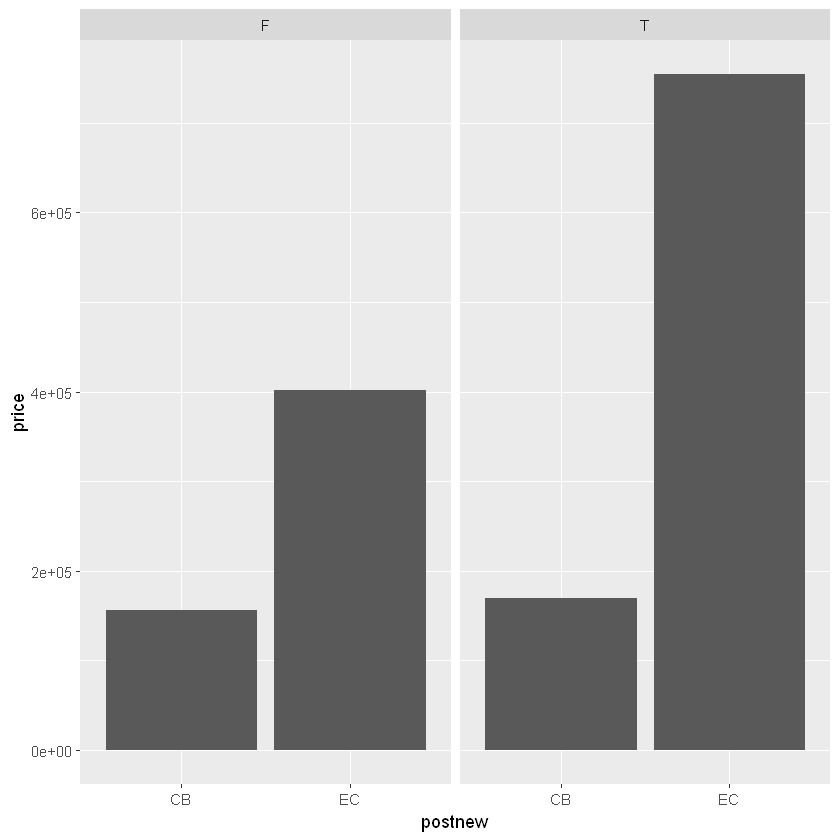

In [327]:
ggplot(data = type_price_mean, aes(postnew,price))+ 
       geom_bar(stat='identity')+ 
       facet_grid(~type)


Price has a relationship with type of apartment. Teraced (high floor level) apartments have higher price then low floor level apartments in choosen two state at the average.

TASK B

In [245]:
#merging data with post codes
merge_data <- merge(data, ukpostcodes, by = "postcode")


#I splitted postcode by numbers using strsplit function
only_code<-strsplit(merge_data$postcode, split = "[0-9]+")
#This code turned postcode two letter part, We need first variable
#First two letter is in location 4 and 5
merge_data$postnew<-substr(only_code, 4,5)
#now we have actual post codes in postnew column

In [246]:
#for merging by a group I used data.table library
library(data.table) 
setDT(merge_data)

In [247]:
#I created different tables for grouping
mean_price_table<-merge_data[ ,list(mean=mean(price)), by=postnew]
max_price_table<-merge_data[ , list(max=max(price)), by = postnew]
min_price_table<-merge_data[ , list(min=min(price)), by = postnew]
median_price_table<-merge_data[ ,list(median=median(price)), by=postnew]

In [248]:
#same way for ukpostcodes file for creating two digit code
only_code<-strsplit(ukpostcodes$postcode, split = "[0-9]+")

ukpostcodes$postnew<-substr(only_code, 4,5)

In [249]:
setDT(ukpostcodes)

mean_lon_table<-ukpostcodes[ ,list(longitude=mean(longitude)), by="postnew"]
mean_lat_table<-ukpostcodes[ , list(latitude=mean(latitude)), by = "postnew"]
merge_coordinates <- merge(mean_lon_table, mean_lat_table, by = "postnew")

merge_price1 <- merge(mean_price_table, max_price_table,
                     by = "postnew")
merge_price2 <- merge(min_price_table, median_price_table,
                      by = "postnew")
merge_stat <- merge(merge_price1, merge_price2, by = "postnew")
price_data <- merge(merge_stat,merge_coordinates,by = "postnew")


In [250]:
tilesURL <- "http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Light_Gray_Base/MapServer/tile/{z}/{y}/{x}"


basemap <- leaflet(width = "100%", height = "400px") %>%
        addTiles(tilesURL)

We can not see min, mean and median values on chart. Because they are relatively small in comparison to max price value. For instance in data set, some house's minimum prices like 1£ while maximum price around 97500000£. 

In [251]:
library(leaflet)
require(leaflet)
basemap %>% 
        addMinicharts(
                price_data$longitude, price_data$latitude,
                type = "auto",
                fillColor = d3.schemeCategory10[1],
                chartdata = price_data[,c("max","min","mean","median")],
                colorPalette = d3.schemeCategory10,
                width = 45, height = 45
        )



HTML widgets cannot be represented in plain text (need html)

I changed question and splited into parts:

1. maximum prices should be shown individual
2. mean and median prices are so close each other. they can shown together
3. minimum prices data meaningless for the visualization. Beacause numbers seem unrealistic

In [252]:
basemap %>% 
        addMinicharts(
                price_data$longitude, price_data$latitude,
                type = "auto",
                fillColor = d3.schemeCategory10[1],
                chartdata = price_data[,c("median","mean")],
                colorPalette = d3.schemeCategory10,
                width = 45, height = 45
        )



HTML widgets cannot be represented in plain text (need html)

In [253]:
basemap %>%
        addMinicharts(
                price_data$longitude, price_data$latitude,
                chartdata = price_data$max,
                showLabels = TRUE,
                width = 45
        )


HTML widgets cannot be represented in plain text (need html)

In [254]:
basemap %>%
        addMinicharts(
                price_data$longitude, price_data$latitude,
                chartdata = price_data$min,
                showLabels = TRUE,
                width = 45
        )


HTML widgets cannot be represented in plain text (need html)

In [255]:
#instead of using Leaflet we can also visualize mean or median prices with ggplot


In [256]:
library(maps)
library(mapdata)
library(maptools)
library(rgdal)
library(ggmap)
library(ggplot2)
library(rgeos)
library(broom)
library(plyr)

I found a shape file in that web-site:

https://geoportal.statistics.gov.uk/datasets/nuts-level-2-january-2018-full-clipped-boundaries-in-the-united-kingdom/explore

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\FDN-Aysu\OneDrive\Masaüstü\DataScience_Master\term_2\Data_Visualization\data", layer: "NUTS_Level_2_(January_2018)_Boundaries"
with 41 features
It has 9 fields


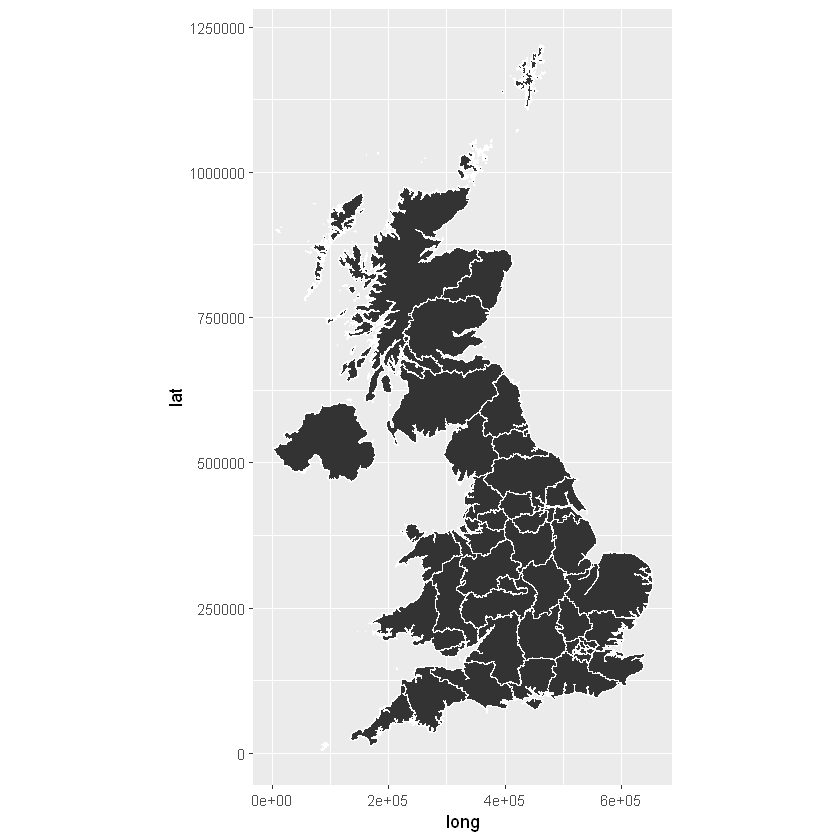

In [257]:
shapefile <- readOGR(dsn="C:/Users/FDN-Aysu/OneDrive/Masaüstü/DataScience_Master/term_2/Data_Visualization/data", 
                     layer="NUTS_Level_2_(January_2018)_Boundaries")

#Reshape for ggplot2 using the Broom package
mapdata <- tidy(shapefile, region="nuts218nm") #This might take a few minutes

#Check the shapefile has loaded correctly by plotting an outline map of the UK
gg <- ggplot() + geom_polygon(data = mapdata, aes(x = long, y = lat, group = group), color = "#FFFFFF", size = 0.25)
gg <- gg + coord_fixed(1) #This gives the map a 1:1 aspect ratio to prevent the map from appearing squashed
print(gg)

In [258]:
#for merging with id columns, I trying to match two different data frames by county names
mapdata$id<-tolower(mapdata$id) #county info in id column
data$county<-tolower(data$county) #county info in county column

In [259]:
copydata<-data
#I changed column name with id for to easyness when merging
colnames(copydata)[14] <- "id"

In [260]:
library(data.table) 
setDT(copydata)
#calculate mean value of price of each id
mean_id_table<-copydata[ ,list(mean=mean(price)), by=id]

In [261]:
merge_id_price_table <- merge(mean_id_table, mapdata, by = "id")

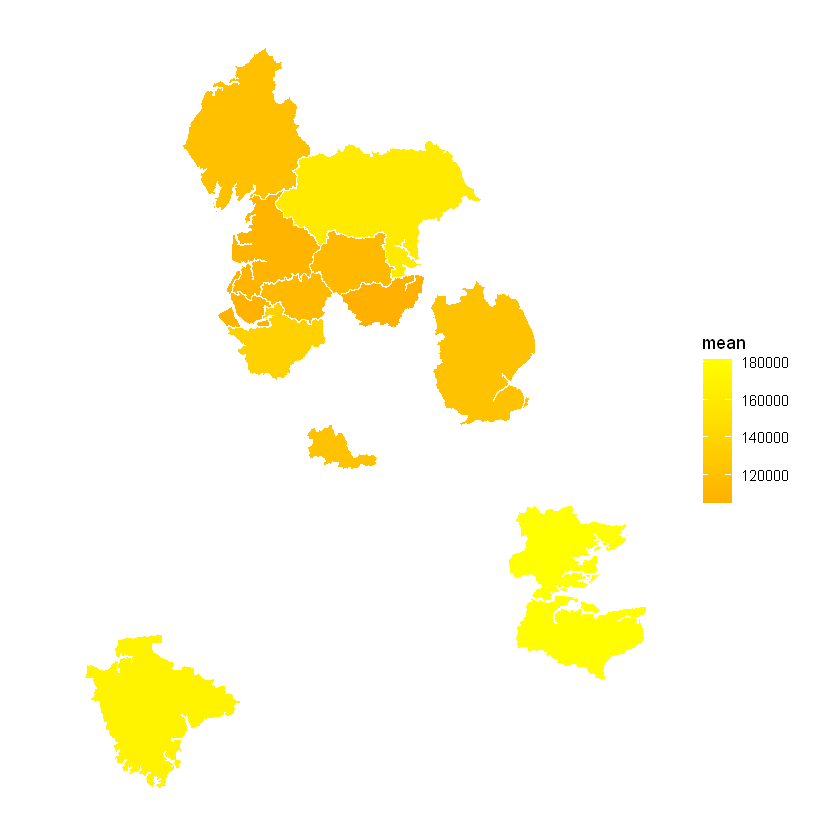

In [262]:
gg <- ggplot() + geom_polygon(data = merge_id_price_table, aes(x = long, y = lat, group = group, fill = mean), color = "#FFFFFF", size = 0.25)
gg <- gg + scale_fill_gradient2(low = "blue", mid = "red", high = "yellow", na.value = "white")
gg <- gg + coord_fixed(1)
gg <- gg + theme_minimal()
gg <- gg + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()                )
gg <- gg + theme(axis.title.x=element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank())
gg <- gg + theme(axis.title.y=element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank())
gg <- gg + geom_tile()
print(gg)

This map can also use for comparing price of each county. However, because of lack of data, I could not find any data set which  matches all post codes with pplite data set. This is why we can not see all the counties in the map above. 

TASK C

copydata

In [263]:
library(dplyr)
data_2015<-filter(merge_data, date_of_transfer >= "2015-01-01" , date_of_transfer <= "2015-12-31")

In [264]:
data_2015

postcode transaction_unique_identifier          price   
1      AL1 1AR  {2AC10E4F-8517-1AF6-E050-A8C063052BA1}  350000 
2      AL1 1EX  {436BFE38-8FDC-4411-B2B1-90D585ED5BCC}  325000 
3      AL1 1EZ  {21E5FEB7-46A9-2439-E050-A8C06205342E}  510000 
4      AL1 1NF  {241A4A53-A926-706B-E050-A8C06205638B}  710000 
5      AL1 1NG  {2554B90C-A1BA-4E76-8BB1-15F2A5FDC05A}  485000 
6      AL1 1NX  {21E5FEB6-0B7B-2439-E050-A8C06205342E}  177000 
7      AL1 1PB  {25EA59F9-C20F-4D50-E050-A8C0630562D0}  265000 
8      AL1 1PF  {23B6165E-4955-FCF4-E050-A8C0620577FA}  718250 
9      AL1 1PG  {25EA59F9-BE9B-4D50-E050-A8C0630562D0}  526000 
10     AL1 1QW  {21E5FEB6-781D-2439-E050-A8C06205342E}  340000 
11     AL1 1QW  {23B6165E-4AA9-FCF4-E050-A8C0620577FA}  420000 
12     AL1 1RJ  {F5E099A1-B1D4-4ECC-94D0-635FE5ACD924}  465000 
13     AL1 1SH  {25EA59F9-C1B8-4D50-E050-A8C0630562D0}  744000 
14     AL1 1SR  {7A613088-FDFA-45FC-988D-86A24FA5E2B2}  648750 
15     AL1 1TA  {21E5FEB7-7D3D-2439-E050-A8C06205342E}  590000 
16     AL1 1TW  {25EA59F9-C126-4D50-E050-A8C0630562D0}  342000 
17     AL1 1UB  {42120E30-22E6-4A41-8020-4A55C79B9AFC} 1500000 
18     AL1 1UB  {5BCA7648-FD28-40F2-8117-A2A222FBCDAE} 1730000 
19     AL1 1UD  {9C80509F-1893-4F90-837C-486000B20A37}  365000 
20     AL1 1UQ  {DBA46339-16B3-4634-B4CD-79245B10D991}  750000 
21     AL1 2AE  {BEC1D9B9-877A-4AA7-AE60-0DC0F74CAC7E}  500000 
22     AL1 2AL  {AB50466D-B4A8-4B82-9402-2427056DC84E}  780000 
23     AL1 2AX  {541AC10C-4213-42F3-A4A3-CA461BCD94D4}  575000 
24     AL1 2AZ  {F142B5A2-E68E-4748-AAD3-1B64867A008E}  238000 
25     AL1 2AZ  {0CB81D24-0A0B-45C2-A4D4-4396FC37F6AF}  480000 
26     AL1 2DT  {21E5FEB7-9267-2439-E050-A8C06205342E}  420000 
27     AL1 2ED  {23B6165E-4C4F-FCF4-E050-A8C0620577FA}  200000 
28     AL1 2EF  {6503B423-5851-4D3F-89CB-2BD0EEA7FD6A}  280000 
29     AL1 2EX  {A1000A82-DA7A-45FF-BE4E-BAB3E969283C}  519000 
30     AL1 2LH  {1E6741D7-DE48-4AA8-88B8-232DD0D6BC11}  227000 
...    ...      ...                                    ...     
115533 YO8 8PS  {2AC10E4F-E401-1AF6-E050-A8C063052BA1}   285500
115534 YO8 8RR  {71A684CE-779E-4451-A2BE-50F4C88610C6}   178000
115535 YO8 8RX  {56FE2523-A5AA-40A6-B951-46DC63AF2BC6}   171000
115536 YO8 8SA  {288DCE29-8F21-E510-E050-A8C06205480E}   130000
115537 YO8 8SA  {2D1E4B26-ABAF-FCD1-E050-A8C0630544EC}   167500
115538 YO8 8SG  {032C3758-57E2-41F2-A14B-80D2FA3B6C6A}   205000
115539 YO8 9AA  {5716FACF-7450-4639-99D3-637497B1668B}   220000
115540 YO8 9AW  {25EA59FA-1011-4D50-E050-A8C0630562D0}   150000
115541 YO8 9BB  {FF78752E-287A-4152-889E-D3CA50635498}   158000
115542 YO8 9BB  {6F4DD53E-6055-413D-B718-68F980110512}   123000
115543 YO8 9BP  {2AC10E4F-E6AE-1AF6-E050-A8C063052BA1}   130000
115544 YO8 9DE  {21E5FEB6-4460-2439-E050-A8C06205342E}   124999
115545 YO8 9DR  {2FD36065-E860-4BF8-E050-A8C0620562B1}   158500
115546 YO8 9EP  {D1B07D9E-8452-4603-9D1F-884AAD2B1CCB}   186000
115547 YO8 9FD  {2D1E4B26-AA6B-FCD1-E050-A8C0630544EC}   123000
115548 YO8 9FX  {5E7F5A2A-F3FF-4E73-A4B0-A2481FC4BBF7}   219950
115549 YO8 9FZ  {0A339E90-6D24-4D38-B76A-CCE312DA681D}   285000
115550 YO8 9GP  {21A0B9C6-4FF1-4E3D-A000-8BF35221267A}   165000
115551 YO8 9JE  {25EA59FA-0FAB-4D50-E050-A8C0630562D0}   175000
115552 YO8 9JG  {23B6165E-B513-FCF4-E050-A8C0620577FA}   215000
115553 YO8 9NF  {25EA59FA-0DE5-4D50-E050-A8C0630562D0}   170000
115554 YO8 9PE  {9333FCDB-63E0-4FF8-A7A3-F1AB557E5831}   115000
115555 YO8 9PQ  {E4817477-3AC1-4081-BBF8-56518CDC91D2}   137000
115556 YO8 9PS  {2AC10E4F-E435-1AF6-E050-A8C063052BA1}   156000
115557 YO8 9PU  {785C2C7B-F557-4734-9585-D2D32473F059}   133000
115558 YO8 9QH  {67257B6E-BED0-4E1E-893A-A3AA33DDD28B}   158000
115559 YO8 9QN  {2AC10E4F-E553-1AF6-E050-A8C063052BA1}   351000
115560 YO8 9TE  {5E32DBAB-2EC1-4D5B-AAF0-F2860D5AAD5D}   175000
115561 YO8 9TJ  {23B6165E-B70F-FCF4-E050-A8C0620577FA}   232000
115562 YO90 1WR {21E5FEB7-6D29-2439-E050-A8C06205342E} 28100000
       date_of_transfer property_type o

In [265]:
group_mean <- aggregate(data_2015$price, by=list(data_2015$postnew,data_2015$date_of_transfer), mean)

In [266]:
group_mean

Group.1 Group.2          x        
1     EN      2015-01-01 00:00  105500.0
2     EX      2015-01-01 00:00  155000.0
3     BA      2015-01-02 00:00  360000.0
4     BN      2015-01-02 00:00  317000.0
5     CF      2015-01-02 00:00  176250.0
6     CM      2015-01-02 00:00  160000.0
7     CT      2015-01-02 00:00  199950.0
8     CV      2015-01-02 00:00  291166.7
9     DT      2015-01-02 00:00  304000.0
10    EX      2015-01-02 00:00  207500.0
11    HD      2015-01-02 00:00  134950.0
12    HG      2015-01-02 00:00  250000.0
13    HR      2015-01-02 00:00  135000.0
14    L"      2015-01-02 00:00   75000.0
15    LE      2015-01-02 00:00  122975.0
16    LS      2015-01-02 00:00  169250.0
17    ME      2015-01-02 00:00  103000.0
18    MK      2015-01-02 00:00  216000.0
19    NG      2015-01-02 00:00   77000.0
20    NP      2015-01-02 00:00   79000.0
21    NR      2015-01-02 00:00  190500.0
22    RG      2015-01-02 00:00  180000.0
23    SA      2015-01-02 00:00  143995.0
24    SK      2015-01-02 00:00 1375000.0
25    SL      2015-01-02 00:00  405500.0
26    SO      2015-01-02 00:00  162500.0
27    SP      2015-01-02 00:00  305000.0
28    SW      2015-01-02 00:00  502500.0
29    SY      2015-01-02 00:00  190000.0
30    TQ      2015-01-02 00:00  110000.0
...   ...     ...              ...      
22841 CF      2015-12-29 00:00  201000.0
22842 CM      2015-12-29 00:00  445000.0
22843 HG      2015-12-29 00:00  175000.0
22844 HR      2015-12-29 00:00  193000.0
22845 ME      2015-12-29 00:00  420000.0
22846 NR      2015-12-29 00:00  119000.0
22847 ST      2015-12-29 00:00   62500.0
22848 WV      2015-12-29 00:00  119950.0
22849 B"      2015-12-30 00:00  707000.0
22850 BA      2015-12-30 00:00  147500.0
22851 BB      2015-12-30 00:00  120000.0
22852 BD      2015-12-30 00:00  157497.5
22853 BH      2015-12-30 00:00  232000.0
22854 CM      2015-12-30 00:00 1761267.0
22855 CO      2015-12-30 00:00  265000.0
22856 CV      2015-12-30 00:00  210000.0
22857 DN      2015-12-30 00:00  227500.0
22858 GL      2015-12-30 00:00  399500.0
22859 GU      2015-12-30 00:00 1317500.0
22860 KT      2015-12-30 00:00  375000.0
22861 LU      2015-12-30 00:00  174950.0
22862 ME      2015-12-30 00:00  355000.0
22863 PO      2015-12-30 00:00  210000.0
22864 S"      2015-12-30 00:00   44000.0
22865 SA      2015-12-30 00:00   55000.0
22866 SN      2015-12-30 00:00  152500.0
22867 ST      2015-12-30 00:00  107000.0
22868 SY      2015-12-30 00:00  120000.0
22869 TA      2015-12-30 00:00  145000.0
22870 W"      2015-12-30 00:00  585000.0

In [267]:
colnames(group_mean)[1] <- "postnew"

In [268]:
group_daily <- merge(group_mean,merge_coordinates,by = "postnew")

In [269]:
group_daily

postnew Group.2          x         longitude  latitude
1     AL      2015-10-27 00:00  666250.0 -0.2860107 51.7763 
2     AL      2015-11-09 00:00 1137500.0 -0.2860107 51.7763 
3     AL      2015-01-14 00:00  265000.0 -0.2860107 51.7763 
4     AL      2015-08-26 00:00  483000.0 -0.2860107 51.7763 
5     AL      2015-10-09 00:00  612384.6 -0.2860107 51.7763 
6     AL      2015-11-13 00:00  202500.0 -0.2860107 51.7763 
7     AL      2015-03-16 00:00 2274332.0 -0.2860107 51.7763 
8     AL      2015-06-03 00:00  575000.0 -0.2860107 51.7763 
9     AL      2015-11-26 00:00  309366.7 -0.2860107 51.7763 
10    AL      2015-06-12 00:00  402487.5 -0.2860107 51.7763 
11    AL      2015-02-26 00:00  648316.7 -0.2860107 51.7763 
12    AL      2015-09-03 00:00  287500.0 -0.2860107 51.7763 
13    AL      2015-02-24 00:00  596750.0 -0.2860107 51.7763 
14    AL      2015-12-04 00:00  397500.0 -0.2860107 51.7763 
15    AL      2015-07-28 00:00  313500.0 -0.2860107 51.7763 
16    AL      2015-02-19 00:00  308300.0 -0.2860107 51.7763 
17    AL      2015-07-13 00:00  247000.0 -0.2860107 51.7763 
18    AL      2015-07-23 00:00  577500.0 -0.2860107 51.7763 
19    AL      2015-02-13 00:00  132500.0 -0.2860107 51.7763 
20    AL      2015-05-29 00:00  259983.3 -0.2860107 51.7763 
21    AL      2015-09-28 00:00  198333.3 -0.2860107 51.7763 
22    AL      2015-03-20 00:00  475000.0 -0.2860107 51.7763 
23    AL      2015-11-02 00:00  291500.0 -0.2860107 51.7763 
24    AL      2015-04-30 00:00  453206.4 -0.2860107 51.7763 
25    AL      2015-01-20 00:00  345000.0 -0.2860107 51.7763 
26    AL      2015-01-15 00:00  555000.0 -0.2860107 51.7763 
27    AL      2015-10-14 00:00  350000.0 -0.2860107 51.7763 
28    AL      2015-08-04 00:00  690000.0 -0.2860107 51.7763 
29    AL      2015-04-14 00:00 2192500.0 -0.2860107 51.7763 
30    AL      2015-06-08 00:00  415000.0 -0.2860107 51.7763 
...   ...     ...              ...       ...        ...     
22841 YO      2015-07-28 00:00 205000.0  -0.8433806 54.07093
22842 YO      2015-11-19 00:00 192050.0  -0.8433806 54.07093
22843 YO      2015-11-09 00:00 363487.5  -0.8433806 54.07093
22844 YO      2015-12-16 00:00 247993.8  -0.8433806 54.07093
22845 YO      2015-11-23 00:00 189995.8  -0.8433806 54.07093
22846 YO      2015-10-23 00:00 241417.5  -0.8433806 54.07093
22847 YO      2015-02-13 00:00 291285.7  -0.8433806 54.07093
22848 YO      2015-06-04 00:00 200000.0  -0.8433806 54.07093
22849 YO      2015-04-01 00:00 129199.0  -0.8433806 54.07093
22850 YO      2015-07-24 00:00 181154.8  -0.8433806 54.07093
22851 YO      2015-07-17 00:00 188546.4  -0.8433806 54.07093
22852 YO      2015-03-25 00:00 261333.3  -0.8433806 54.07093
22853 YO      2015-12-18 00:00 183950.0  -0.8433806 54.07093
22854 YO      2015-01-12 00:00 125000.0  -0.8433806 54.07093
22855 YO      2015-09-14 00:00 178750.0  -0.8433806 54.07093
22856 YO      2015-06-22 00:00 129000.0  -0.8433806 54.07093
22857 YO      2015-12-23 00:00 163362.5  -0.8433806 54.07093
22858 YO      2015-09-24 00:00 233750.0  -0.8433806 54.07093
22859 YO      2015-06-23 00:00 172500.0  -0.8433806 54.07093
22860 YO      2015-07-02 00:00 249340.0  -0.8433806 54.07093
22861 YO      2015-07-31 00:00 211629.9  -0.8433806 54.07093
22862 YO      2015-05-26 00:00 218750.0  -0.8433806 54.07093
22863 YO      2015-07-16 00:00 188666.7  -0.8433806 54.07093
22864 YO      2015-03-09 00:00 177500.0  -0.8433806 54.07093
22865 YO      2015-09-09 00:00 174333.3  -0.8433806 54.07093
22866 YO      2015-02-06 00:00 184687.5  -0.8433806 54.07093
22867 YO      2015-11-04 00:00 705000.0  -0.8433806 54.07093
22868 YO      2015-11-10 00:00 149000.0  -0.8433806 54.07093
22869 YO      2015-10-19 00:00 145000.0  -0.8433806 54.07093
22870 YO      2015-02-19 00:00 206141.7  -0.8433806 54.07093

First, I tried group day by day. It is mean price change of each day in each post code region. We can see the change with pressing play button

In [270]:
basemap %>% 
  addMinicharts(
    group_daily$longitude, group_daily$latitude,
    chartdata = group_daily$x, 
    time = group_daily$Group.2,
    colorPalette = colors,
    showLabels = TRUE,
    width = 100, height = 100
  )

HTML widgets cannot be represented in plain text (need html)

In [271]:
group_mean_copy<-group_mean

In [272]:
#  Convert to date if not already
group_mean_copy$Group.2 <- as.Date(group_mean_copy$Group.2)

#  Get months
group_mean_copy$Month <- months(group_mean_copy$Group.2)

#  Get years
group_mean_copy$Year <- format(group_mean_copy$Group.2,format="%y")

group_mean_copy$Month <- format(group_mean_copy$Group.2,format="%m")

In [273]:
group_mean_copy_mth <- aggregate(group_mean_copy$x, by=list(group_mean_copy$postnew,group_mean_copy$Month), mean)

In [274]:
group_mean_copy_mth

Group.1 Group.2 x        
1    AL      01       443141.2
2    B"      01       202253.2
3    BA      01       323483.0
4    BB      01       120806.3
5    BD      01       144978.4
6    BH      01       462992.9
7    BL      01       181013.9
8    BN      01       317346.2
9    BR      01       342198.4
10   BS      01       241564.0
11   CA      01       114361.1
12   CB      01       350222.9
13   CF      01       336109.0
14   CH      01       183191.0
15   CM      01       274484.0
16   CO      01       366044.4
17   CR      01       407939.4
18   CT      01       235567.7
19   CV      01       193472.6
20   CW      01       167831.3
21   DA      01       274153.2
22   DE      01       171050.0
23   DH      01       177126.0
24   DL      01       136135.3
25   DN      01       133687.1
26   DT      01       276819.0
27   DY      01       166587.8
28   E"      01       370887.4
29   EC      01      1313984.0
30   EN      01       295265.4
...  ...     ...     ...      
1230 SK      12       235920.0
1231 SL      12       429059.3
1232 SM      12       475196.8
1233 SN      12       298866.5
1234 SO      12       311518.5
1235 SP      12       260917.0
1236 SR      12       146326.4
1237 SS      12       260733.0
1238 ST      12       273267.8
1239 SW      12      1277221.7
1240 SY      12       203311.3
1241 TA      12       195465.4
1242 TD      12       136626.8
1243 TF      12       162494.3
1244 TN      12       336248.7
1245 TQ      12       227952.1
1246 TR      12       230851.7
1247 TS      12       140964.4
1248 TW      12       891584.1
1249 UB      12       398024.2
1250 W"      12      1957838.0
1251 WA      12       238461.7
1252 WC      12       633912.5
1253 WD      12       386637.1
1254 WF      12       182692.3
1255 WN      12       141896.5
1256 WR      12       533737.9
1257 WS      12       169876.6
1258 WV      12       161705.6
1259 YO      12       197742.8

In [275]:
colnames(group_mean_copy_mth)[1] <- "postnew"

In [276]:
group_monthly <- merge(group_mean_copy_mth,merge_coordinates,by = "postnew")

In [277]:
group_monthly

postnew Group.2 x        longitude  latitude
1    AL      01      443141.2 -0.2860107 51.77630
2    AL      11      520968.4 -0.2860107 51.77630
3    AL      05      385464.2 -0.2860107 51.77630
4    AL      10      537281.6 -0.2860107 51.77630
5    AL      02      357410.9 -0.2860107 51.77630
6    AL      09      477723.1 -0.2860107 51.77630
7    AL      08      546767.0 -0.2860107 51.77630
8    AL      04      585865.8 -0.2860107 51.77630
9    AL      03      527089.7 -0.2860107 51.77630
10   AL      07      464839.6 -0.2860107 51.77630
11   AL      06      545145.7 -0.2860107 51.77630
12   AL      12      564850.3 -0.2860107 51.77630
13   B"      10      189015.4 -1.8887466 52.46302
14   B"      07      344715.2 -1.8887466 52.46302
15   B"      04      192497.0 -1.8887466 52.46302
16   B"      11      231189.1 -1.8887466 52.46302
17   B"      05      209476.1 -1.8887466 52.46302
18   B"      01      202253.2 -1.8887466 52.46302
19   B"      09      257782.5 -1.8887466 52.46302
20   B"      08      246322.2 -1.8887466 52.46302
21   B"      02      202051.3 -1.8887466 52.46302
22   B"      03      220295.5 -1.8887466 52.46302
23   B"      12      241554.4 -1.8887466 52.46302
24   B"      06      205257.5 -1.8887466 52.46302
25   BA      05      241721.2 -2.4205130 51.22162
26   BA      08      279224.0 -2.4205130 51.22162
27   BA      12      212138.9 -2.4205130 51.22162
28   BA      10      269826.3 -2.4205130 51.22162
29   BA      01      323483.0 -2.4205130 51.22162
30   BA      11      366194.6 -2.4205130 51.22162
...  ...     ...     ...      ...        ...     
1230 WS      02      203051.5 -1.9546939 52.64760
1231 WS      10      171053.6 -1.9546939 52.64760
1232 WS      11      183059.3 -1.9546939 52.64760
1233 WS      01      253772.9 -1.9546939 52.64760
1234 WS      07      158574.4 -1.9546939 52.64760
1235 WS      08      192258.1 -1.9546939 52.64760
1236 WV      04      229406.6 -2.1787581 52.57470
1237 WV      06      170810.0 -2.1787581 52.57470
1238 WV      11      194950.0 -2.1787581 52.57470
1239 WV      02      114612.9 -2.1787581 52.57470
1240 WV      01      119701.3 -2.1787581 52.57470
1241 WV      12      161705.6 -2.1787581 52.57470
1242 WV      09      163915.8 -2.1787581 52.57470
1243 WV      05      182471.7 -2.1787581 52.57470
1244 WV      07      163493.7 -2.1787581 52.57470
1245 WV      10      175267.2 -2.1787581 52.57470
1246 WV      03      296671.2 -2.1787581 52.57470
1247 WV      08      176674.4 -2.1787581 52.57470
1248 YO      06      332536.4 -0.8433806 54.07093
1249 YO      01      217901.6 -0.8433806 54.07093
1250 YO      02      211095.7 -0.8433806 54.07093
1251 YO      09      242353.0 -0.8433806 54.07093
1252 YO      05      179515.5 -0.8433806 54.07093
1253 YO      04      206663.6 -0.8433806 54.07093
1254 YO      10      209749.2 -0.8433806 54.07093
1255 YO      11      239511.3 -0.8433806 54.07093
1256 YO      08      227965.5 -0.8433806 54.07093
1257 YO      03      230156.1 -0.8433806 54.07093
1258 YO      07      262433.9 -0.8433806 54.07093
1259 YO      12      197742.8 -0.8433806 54.07093

Secondly, It is monthy grouped visualization. Each circle are demonstrating mean price of a month in 2015 by postcode region

In [278]:
basemap %>% 
  addMinicharts(
    group_monthly$longitude, group_monthly$latitude,
    chartdata = group_monthly$x, 
    time = group_monthly$Group.2,
    colorPalette = colors,
    showLabels = TRUE,
    width = 100, height = 100
  )

HTML widgets cannot be represented in plain text (need html)

In [279]:
group_all_dates <- aggregate(merge_data$price, by=list(merge_data$postnew,merge_data$date_of_transfer,merge_data$property_type), mean)

In [280]:
colnames(group_all_dates)[1] <- "postnew"
colnames(group_all_dates)[2] <- "date"
colnames(group_all_dates)[3] <- "type"
colnames(group_all_dates)[4] <- "price"

In [281]:
group_all_dates

postnew date             type price    
1       CB      1995-01-02 00:00 D    106500.0 
2       BD      1995-01-03 00:00 D     75000.0 
3       BH      1995-01-03 00:00 D     90000.0 
4       BN      1995-01-03 00:00 D     73300.0 
5       BS      1995-01-03 00:00 D     37500.0 
6       CF      1995-01-03 00:00 D     95000.0 
7       CO      1995-01-03 00:00 D     29500.0 
8       CV      1995-01-03 00:00 D     60000.0 
9       DN      1995-01-03 00:00 D    110000.0 
10      EX      1995-01-03 00:00 D    115912.5 
11      GL      1995-01-03 00:00 D    115000.0 
12      HU      1995-01-03 00:00 D    170000.0 
13      LE      1995-01-03 00:00 D    180000.0 
14      MK      1995-01-03 00:00 D     31750.0 
15      NG      1995-01-03 00:00 D     88500.0 
16      NN      1995-01-03 00:00 D     43000.0 
17      NR      1995-01-03 00:00 D     59000.0 
18      PL      1995-01-03 00:00 D     51500.0 
19      PO      1995-01-03 00:00 D     80000.0 
20      SA      1995-01-03 00:00 D     87000.0 
21      SP      1995-01-03 00:00 D    105000.0 
22      SY      1995-01-03 00:00 D    100000.0 
23      TN      1995-01-03 00:00 D    104500.0 
24      WA      1995-01-03 00:00 D    175000.0 
25      WF      1995-01-03 00:00 D     39000.0 
26      WV      1995-01-03 00:00 D     46500.0 
27      AL      1995-01-04 00:00 D    180000.0 
28      BA      1995-01-04 00:00 D    123416.7 
29      BH      1995-01-04 00:00 D    140650.0 
30      BN      1995-01-04 00:00 D     99950.0 
...     ...     ...              ...  ...      
1076526 SW      2016-03-24 00:00 T     605000.0
1076527 TR      2016-03-24 00:00 T      74000.0
1076528 TS      2016-03-24 00:00 T      50000.0
1076529 TW      2016-03-24 00:00 T     545000.0
1076530 UB      2016-03-24 00:00 T     325000.0
1076531 W"      2016-03-24 00:00 T    2150000.0
1076532 WA      2016-03-24 00:00 T      77000.0
1076533 WD      2016-03-24 00:00 T     348000.0
1076534 YO      2016-03-24 00:00 T     147999.5
1076535 M"      2016-03-25 00:00 T      55000.0
1076536 B"      2016-03-29 00:00 T     152000.0
1076537 CO      2016-03-29 00:00 T     260000.0
1076538 CR      2016-03-29 00:00 T     287000.0
1076539 DE      2016-03-29 00:00 T     117000.0
1076540 IP      2016-03-29 00:00 T     179950.0
1076541 L"      2016-03-29 00:00 T      85000.0
1076542 LA      2016-03-29 00:00 T      70000.0
1076543 ME      2016-03-29 00:00 T     195000.0
1076544 NE      2016-03-29 00:00 T      40000.0
1076545 PE      2016-03-29 00:00 T     155750.0
1076546 SY      2016-03-29 00:00 T     111000.0
1076547 WD      2016-03-29 00:00 T     335000.0
1076548 WF      2016-03-29 00:00 T     110000.0
1076549 B"      2016-03-30 00:00 T      95000.0
1076550 CT      2016-03-30 00:00 T     125000.0
1076551 LL      2016-03-30 00:00 T     135000.0
1076552 LU      2016-03-30 00:00 T     255000.0
1076553 PR      2016-03-30 00:00 T      83000.0
1076554 SL      2016-03-30 00:00 T     223000.0
1076555 SW      2016-03-30 00:00 T    1405000.0

In [282]:
#  Convert to date if not already
group_all_dates$date <- as.Date(group_all_dates$date)

#  Get months
group_all_dates$Month <- months(group_all_dates$date)

#  Get years
group_all_dates$Year <- year(group_all_dates$date)

group_all_dates$Month <- format(group_all_dates$date,format="%m")

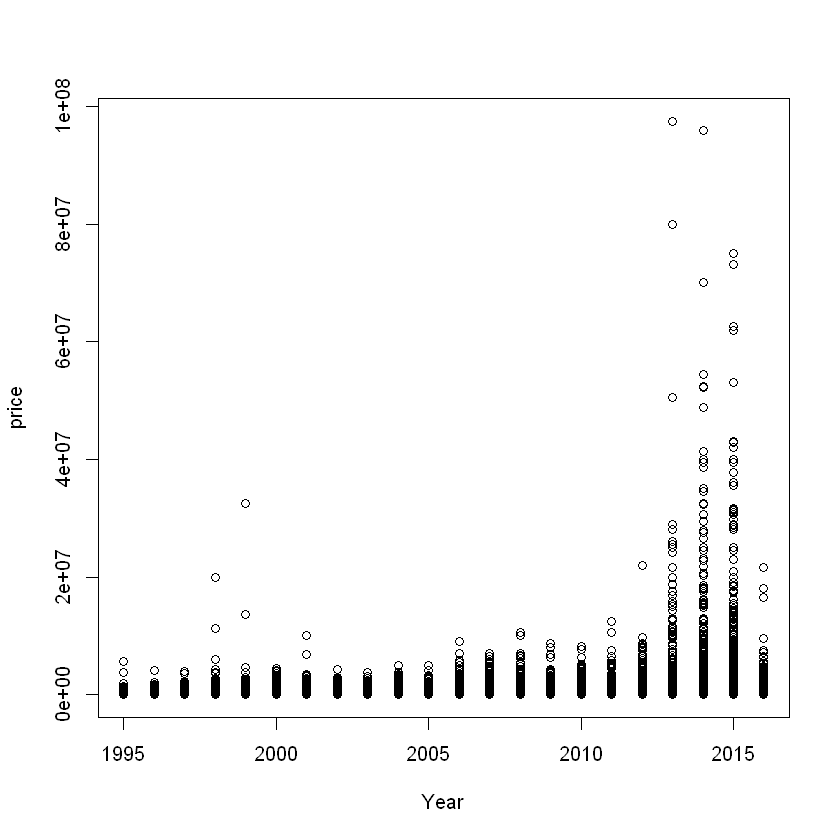

In [283]:
plot(price ~ Year, data = group_all_dates)

There are a lot of outliers. So, it is hard to see a relationship during the years. I cleaned a little bit of price data

In [284]:
cleaned <- group_all_dates %>%
         filter(price< 1000000 & price > 1000 & postnew == "EC")

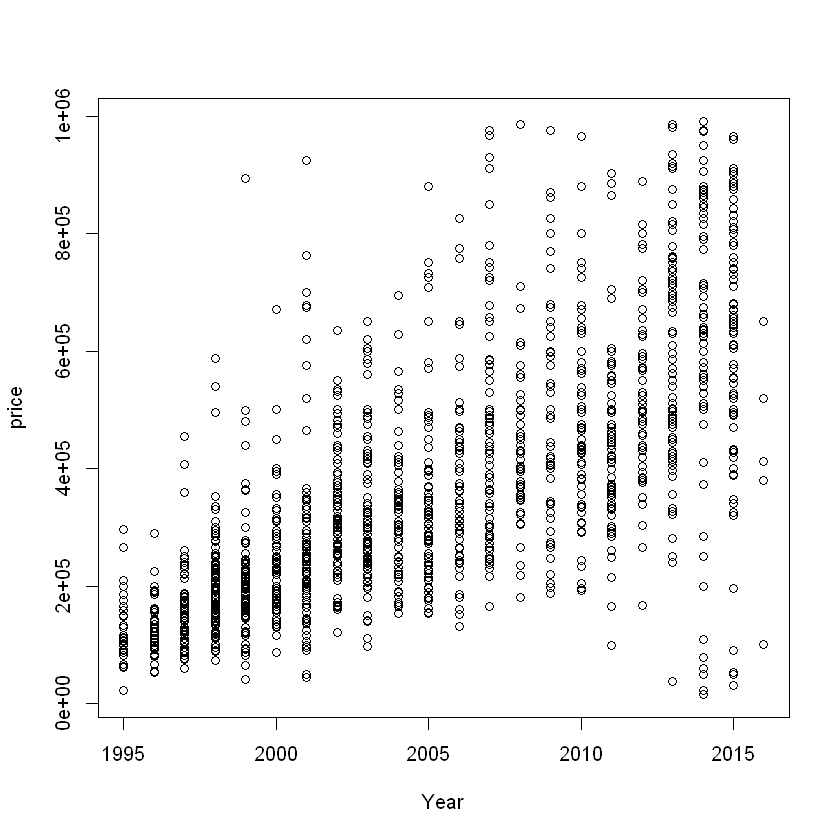

In [285]:
plot(price ~ Year, data = cleaned)

We can say that house prices have increased over the years.

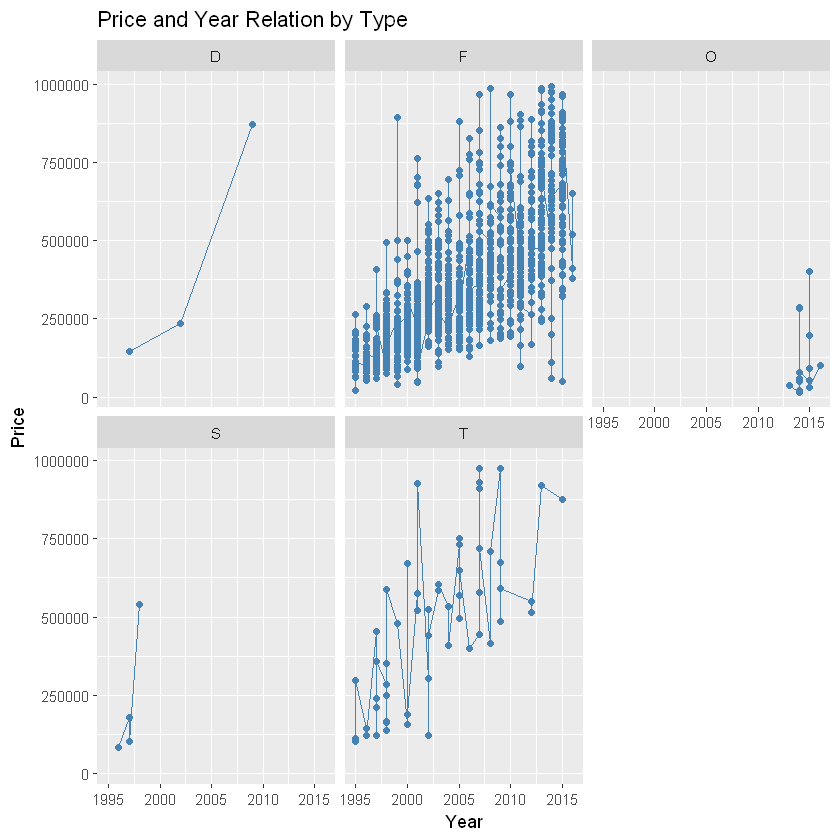

In [286]:
ggplot(data = cleaned, aes(Year, price)) +
  geom_line(color = "steelblue", size = 0.5) +
  geom_point(color="steelblue") + 
  labs(title = "Price and Year Relation by Type",
       y = "Price", x = "Year") + 
  facet_wrap(~ type)

the data generally have type F and T types. We can see price going up during the years of each type

Thank you so much for this final project and the whole course. I learned a lot of new material. Additionally, I am feeling much better in R programming language after this course. 

Thank you again for helping me learn so much...


Şeyma Aysu Demir

26-03-2022